<a href="https://colab.research.google.com/github/raguram/EVA8P1/blob/main/S12-Clip-Yolo/YOLO_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np

## Download the weights, Config and Coco Names

In [2]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2023-04-07 15:53:43--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  32.2MB/s    in 21s     

2023-04-07 15:54:05 (11.2 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [3]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2023-04-07 15:54:08--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2023-04-07 15:54:08 (85.7 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [4]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

--2023-04-07 15:54:11--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2023-04-07 15:54:11 (23.4 MB/s) - ‘coco.names’ saved [625/625]



## Instantiate the network

In [6]:
net = cv2.dnn.readNet("/content/yolov3.weights", "/content/yolov3.cfg")
classes = []
with open("/content/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))
print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


## Load the image

(512, 1024, 3)


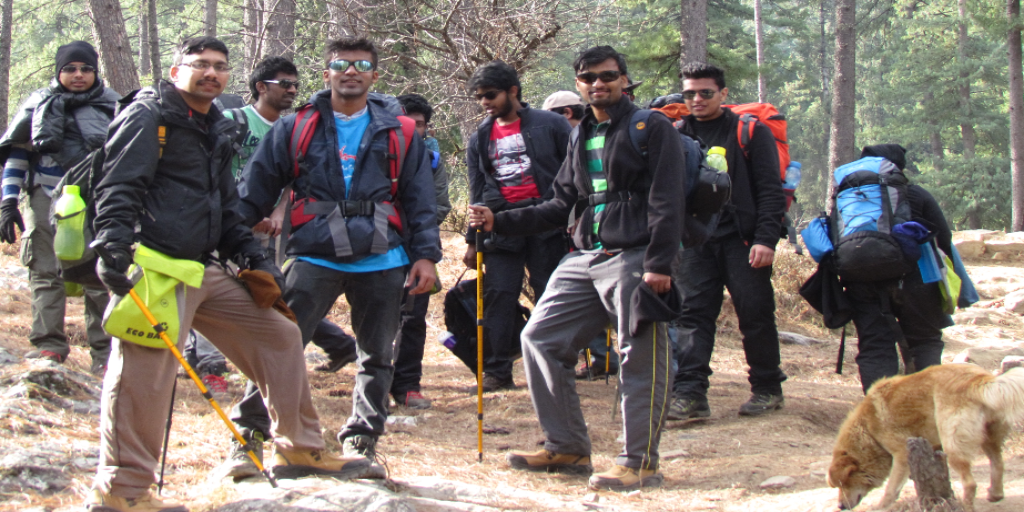

In [21]:
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/download.png")
img = cv2.resize(img, (1024, 512), fx=0.25, fy=0.25)
height, width, channels = img.shape
print(img.shape)
cv2_imshow(img)

## Prepare the image and Predict 

Blob it’s used to extract feature from the image and to resize them. YOLO accepts three sizes:

*   320×320 it’s small so less accuracy but better speed
*   609×609 it’s bigger so high accuracy and slow speed
* 416×416 it’s in the middle and you get a bit of both.



In [22]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

## Prepare the output

In [23]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

## Display the output




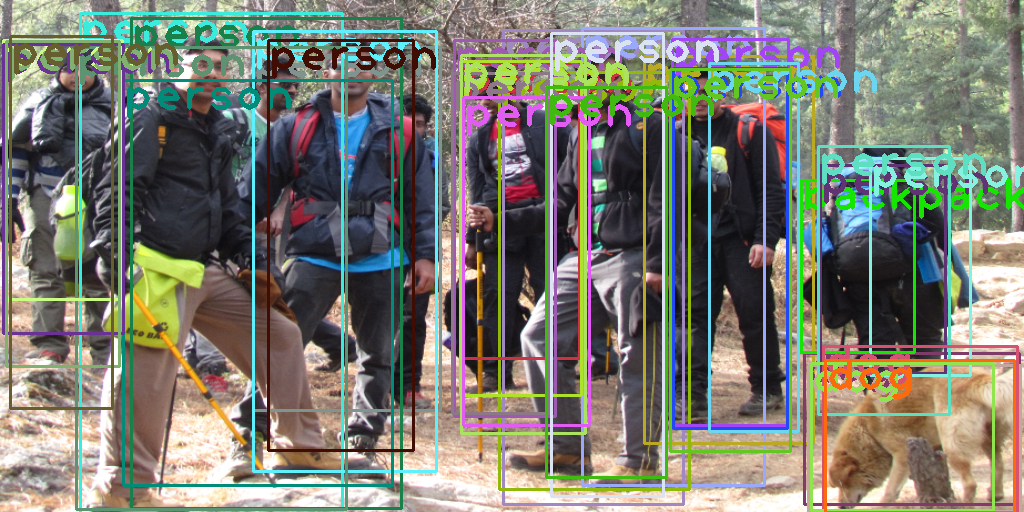

In [24]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[i]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Non maximum suppresion

In [25]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

## Display the output after NMS

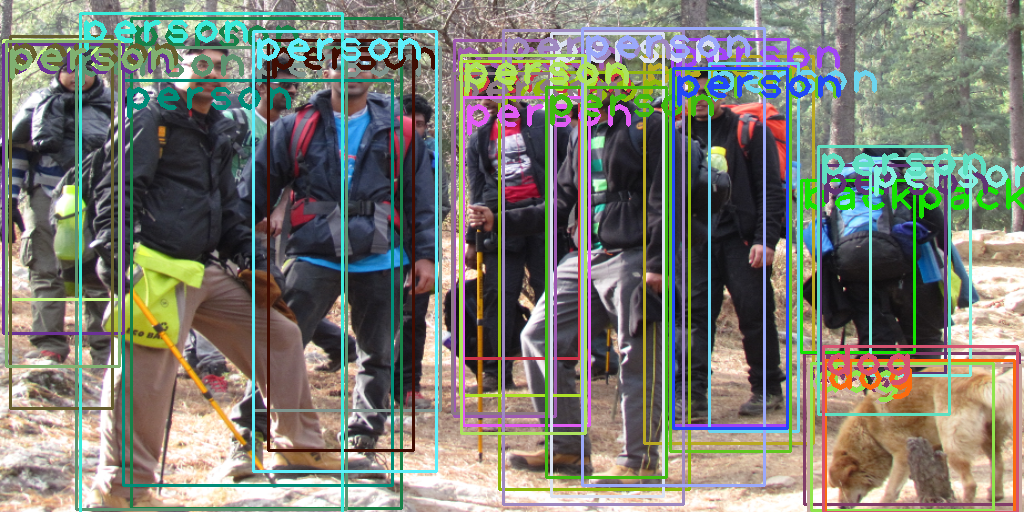

In [26]:
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()